In [114]:
import glob
import pandas as pd
import csv
import os
import numpy as np
import matplotlib.pyplot as plt

In [115]:
path = os.path.abspath("STAVE_MARKERPOS_2018_2_12_B-ML-Stave-0_B-HS-R-0_ALC-0312-00_026_B-HS-L-0_ALC-0312-00_120.csv")

In [116]:
path1 = glob.glob(path)[0]

In [117]:
data = pd.read_csv(open(path1), header = None, usecols = [2, 4, 5, 6])

In [118]:
label = pd.DataFrame.get(data, 2)
x = pd.DataFrame.get(data, 4)
y = pd.DataFrame.get(data, 5)
z = pd.DataFrame.get(data, 6)

In [119]:
slices = data.index[label == u'MarkerCenter '].tolist()
one, two, three, four = slices[0], slices[1], slices[2], slices[3]
five, six, seven, eight = slices[4], slices[5], slices[6], slices[7]

In [120]:
mod1, mod2, mod3, mod4 = data[one+1:two-4], data[two+1:three-4], data[three+1:four-4], data[four+1:five-4]
mod5, mod6, mod7, mod8 = data[five+1:six-4], data[six+1:seven-4], data[seven+1:eight-4], data[eight+1:-4]
low = pd.concat([mod1, mod2, mod3, mod4])[[4, 5, 6]]
up = pd.concat([mod5, mod6, mod7, mod8])[[4, 5, 6]]

In [121]:
# z residuals
low_dz_pos = (low[low[4] > 0][6] - 13.3)*1000
low_dz_pos_y = low[low[4] > 0][5]
low_dz_neg = (low[low[4] < 0][6] - 13.3)*1000
low_dz_neg_y = low[low[4] < 0][5]
up_dz = (up[6] - 9.7)*1000
up_dz_y = up[5]

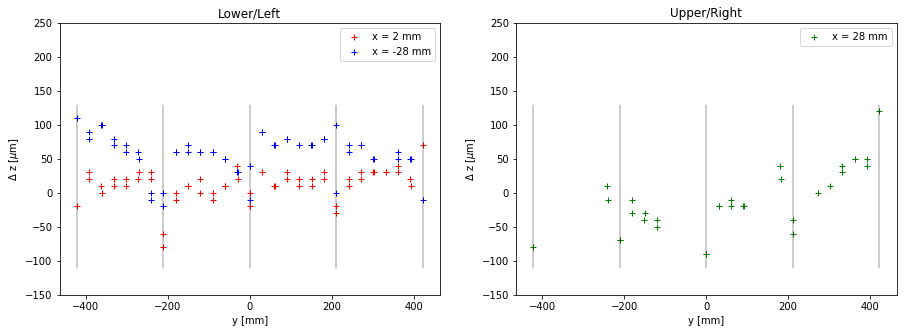

In [122]:
# z plots
dz, axes = plt.subplots(nrows=1, ncols=2, figsize = (15, 5))
zlow, zup = axes.flatten()

zlow.plot(low_dz_pos_y, low_dz_pos, 'r+', label = 'x = 2 mm')
zlow.plot(low_dz_neg_y, low_dz_neg, 'b+', label = 'x = -28 mm')
zlow.set(xlabel="y [mm]")
zlow.set(ylabel = "$\Delta$ z [$\mu$m]")
zlow.set_title('Lower/Left')
zlow.set_ylim([-150, 250])
for i in [-422, -211, 0, 211, 422]:
    zlow.axvline(x = i, ymin = .1, ymax = .7, c = 'k', linewidth = .4)
zlow.legend(loc = 1)

zup.plot(up_dz_y, up_dz, 'g+', label = 'x = 28 mm')
zup.set(xlabel="y [mm]")
zup.set(ylabel = "$\Delta$ z [$\mu$m]")
zup.set_title('Upper/Right')
zup.set_ylim([-150, 250])
for i in [-422, -211, 0, 211, 422]:
    zup.axvline(x = i, ymin = .1, ymax = .7, c = 'k', linewidth = .4)
zup.legend(loc = 1)
    
plt.show()

In [123]:
# x residuals
low_dx_pos = (low[low[4] > 0][4] - 2.099)*1000
low_dx_pos_y = low[low[4] > 0][5]
low_dx_neg = (low[low[4] < 0][4] + 27.899)*1000
low_dx_neg_y = low[low[4] < 0][5]
up_dx = (up[4] - 27.899)*1000
up_dx_y = (up[5])

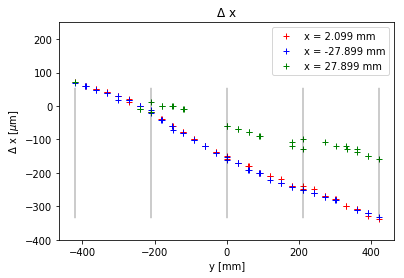

In [124]:
# x plots
plt.plot(low_dx_pos_y, low_dx_pos, 'r+', label = 'x = 2.099 mm')
plt.plot(low_dx_neg_y, low_dx_neg, 'b+', label = 'x = -27.899 mm')
plt.plot(up_dx_y, up_dx, 'g+', label = 'x = 27.899 mm')
plt.xlabel("y [mm]")
plt.ylabel("$\Delta$ x [$\mu$m]")
plt.ylim([-400, 250])
for i in [-422, -211, 0, 211, 422]:
    plt.axvline(x = i, ymin = .1, ymax = .7, c = 'k', linewidth = .4)
plt.legend(loc = 1)
plt.title("$\Delta$ x")
    
plt.show()

In [125]:
# y residuals
m1 = [-421.925, -211.375] # markers [a, b] for module 1
m2 = [-210.825, -0.275]
m3 = [0.275, 210.825]
m4 = [211.375, 421.925]

m1a, m1b = m1[0], m1[1]
m2a, m2b = m2[0], m2[1]
m3a, m3b = m3[0], m3[1]
m4a, m4b = m4[0], m4[1]

markers = np.concatenate([m1, m2, m3, m4])

In [126]:
# low AD markers
ones = mod1[abs(mod1[5]-m1a)<0.4]
ones_a = ones[ones[4]>0][5] # A marker
ones_d = ones[ones[4]<0][5] # D marker

twos = mod2[abs(mod2[5]-m2a)<0.4]
twos_a = twos[twos[4]>0][5]
twos_d = twos[twos[4]<0][5]

threes = mod3[abs(mod3[5]-m3a)<0.4]
threes_a = threes[threes[4]>0][5]
threes_d = threes[threes[4]<0][5]

fours = mod4[abs(mod4[5]-m4a)<0.4]
fours_a = fours[fours[4]>0][5]
fours_d = fours[fours[4]<0][5]

# low BC markers
Ones = mod1[abs(mod1[5]-m1b)<0.4]
Ones_b = Ones[Ones[4]>0][5] # B marker
Ones_c = Ones[Ones[4]<0][5] # C marker

Twos = mod2[abs(mod2[5]-m2b)<0.4]
Twos_b = Twos[Twos[4]>0][5]
Twos_c = Twos[Twos[4]<0][5]

Threes = mod3[abs(mod3[5]-m3b)<0.4]
Threes_b = Threes[Threes[4]>0][5]
Threes_c = Threes[Threes[4]<0][5]

Fours = mod4[abs(mod4[5]-m4b)<0.4]
Fours_b = Fours[Fours[4]>0][5]
Fours_c = Fours[Fours[4]<0][5]

# up AB markers
five_a = mod5[abs(mod5[5]-m1a)<0.8][5]
five_b = mod5[abs(mod5[5]-m1b)<0.8][5]

six_a = mod6[abs(mod6[5]-m2a)<0.8][5]
six_b = mod6[abs(mod6[5]-m2b)<0.8][5]

seven_a = mod7[abs(mod7[5]-m3a)<0.8][5]
seven_b = mod7[abs(mod7[5]-m3b)<0.8][5]

eight_a = mod8[abs(mod8[5]-m4a)<0.8][5]
eight_b = mod8[abs(mod8[5]-m4b)<0.8][5]

In [127]:
low_ab = np.array([float(i) for i in [ones_a, Ones_b, twos_a, Twos_b, threes_a, Threes_b, fours_a, Fours_b]])
low_dc = np.array([float(i) for i in [ones_d, Ones_c, twos_d, Twos_c, threes_d, Threes_c, fours_d, Fours_c]])
up_ab = np.array([float(i) for i in [five_a, five_b, six_a, six_b, seven_a, seven_b, eight_a, eight_b]])

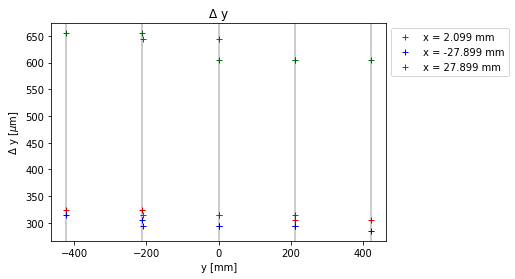

In [128]:
plt.plot(markers, (low_ab - markers)*1000, 'r+', label = "x = 2.099 mm")
plt.plot(markers, (low_dc - markers)*1000, 'b+', label = "x = -27.899 mm")
plt.plot(markers, (up_ab - markers)*1000, 'g+', label = "x = 27.899 mm")
for i in [-422, -211, 0, 211, 422]:
    plt.axvline(x = i, ymin = 0, ymax = 1, c = 'k', linewidth = .4)
plt.title("$\Delta$ y")
plt.xlabel("y [mm]")
plt.ylabel("$\Delta$ y [$\mu$m]")
plt.legend(bbox_to_anchor=(1, 1))
plt.show()